# Handwritten digit recognition using MNIST dataset

In [93]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [94]:
# Read the training dataset
train = pd.read_csv("dataset/mnist_train.csv")
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Ploting some images from the dataset

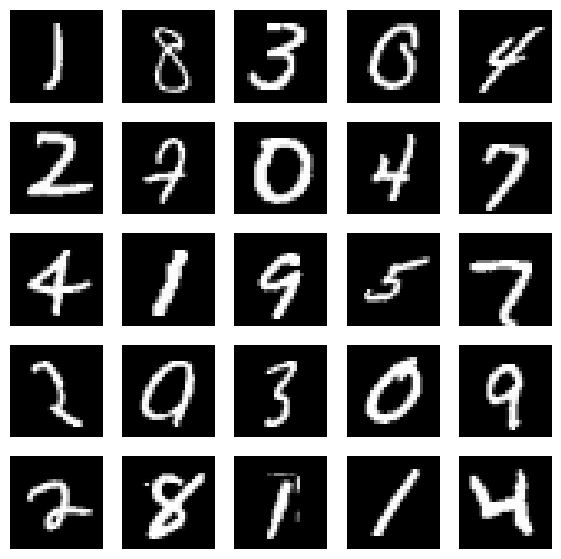

In [95]:
# Plot the data into a graph
plt.figure(figsize=(7,7))
idx = 1

for i in np.random.randint(0, 1000, 25):
    # Reshape the 784 values into a 28x28 image
    img = train.iloc[i, 1:].values.reshape(28,28)
    plt.subplot(5, 5, idx)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    idx += 1

plt.show()

## Importing the dataset

In [96]:
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values

# Normalize the data
X_train = X_train / 255.0

X_train, X_train.shape, y_train, y_train.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (60000, 784),
 array([5, 0, 4, ..., 5, 6, 8], dtype=int64),
 (60000,))

## Importing the test dataset

In [97]:
# Read the test dataset
test = pd.read_csv("dataset/mnist_test.csv")
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


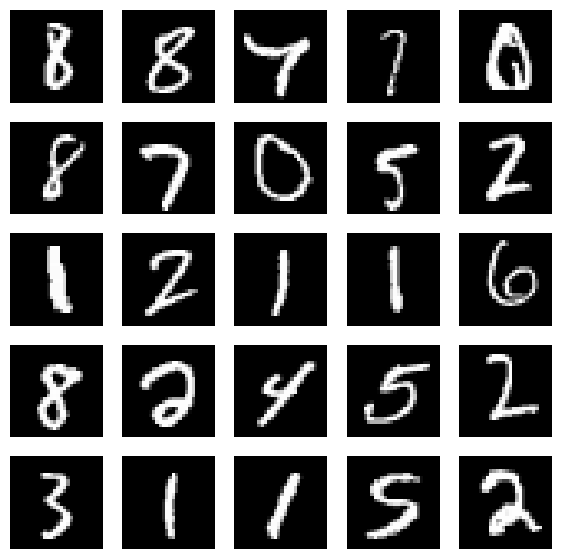

In [98]:
# Plot the data into a graph
plt.figure(figsize=(7,7))
idx = 1

for i in np.random.randint(0, 1000, 25):
    # Reshape the 784 values into a 28x28 image
    img = test.iloc[i, 1:].values.reshape(28,28)
    plt.subplot(5, 5, idx)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    idx += 1

In [99]:
X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

# Normalize the data
X_test = X_test / 255.0

X_test, X_test.shape, y_test, y_test.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (10000, 784),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 (10000,))

## Training the models

In [100]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, mean_absolute_error, mean_squared_error,
                             classification_report)

### Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

log_y_pred = logisticRegr.predict(X_test)

print("Classification Report: \n", classification_report(y_test, log_y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



<Axes: >

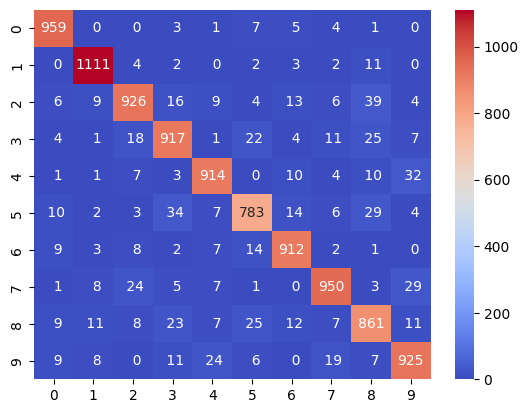

In [102]:
sns.heatmap(confusion_matrix(y_test, log_y_pred),
            annot=True, fmt="3.0f", cmap='coolwarm')

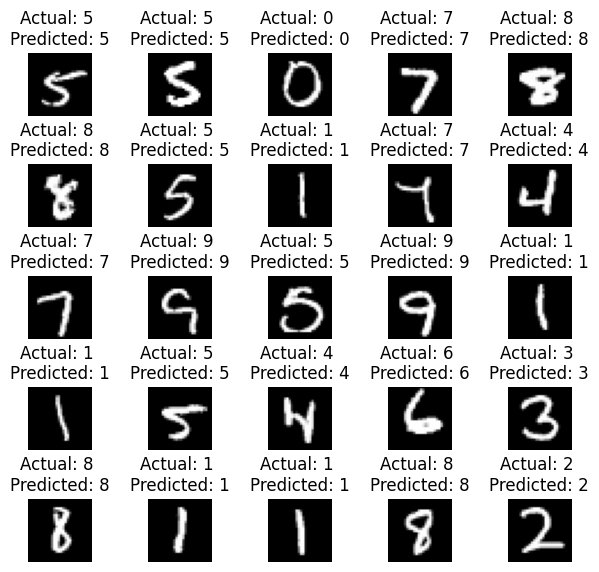

In [103]:
# Plot the linear regression model
plt.figure(figsize=(7,7))
idx = 1

for i in np.random.randint(0, 1000, 25):
    # Reshape the 784 values into a 28x28 image
    img = X_test[i].reshape(28,28)
    plt.subplot(5, 5, idx)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(wspace=0.9)
    plt.title("Actual: {} \nPredicted: {}".format(y_test[i], log_y_pred[i]))
    plt.axis('off')
    idx += 1

plt.show()

### KNN Classifier model

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

print("Classification Report: \n", classification_report(y_test, knn_y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<Axes: >

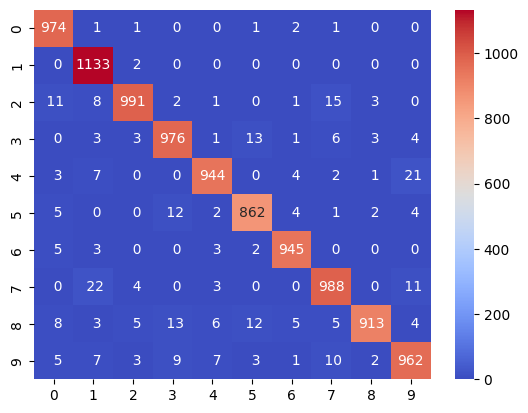

In [105]:
sns.heatmap(confusion_matrix(y_test, knn_y_pred),
            annot=True, fmt="3.0f", cmap='coolwarm')

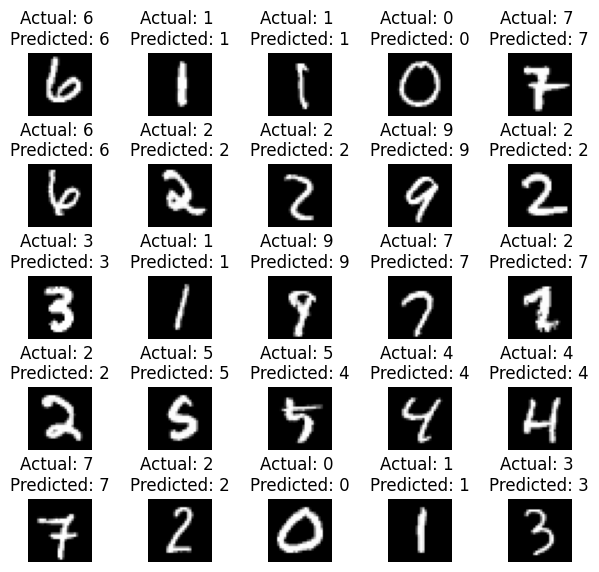

In [106]:
# Plot the KNN model
plt.figure(figsize=(7,7))
idx = 1

for i in np.random.randint(0, 1000, 25):
    # Reshape the 784 values into a 28x28 image
    img = X_test[i].reshape(28,28)
    plt.subplot(5, 5, idx)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(wspace=0.9)
    plt.title("Actual: {} \nPredicted: {}".format(y_test[i], knn_y_pred[i]))
    plt.axis('off')
    idx += 1

plt.show()

### Neural Network model

In [107]:
# Create a neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1
)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2802 - accuracy: 0.9171 - val_loss: 0.1212 - val_accuracy: 0.9608
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1192 - accuracy: 0.9645 - val_loss: 0.0922 - val_accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9743 - val_loss: 0.0795 - val_accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9793 - val_loss: 0.0886 - val_accuracy: 0.9740
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0543 - accuracy: 0.9833 - val_loss: 0.0756 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0782 - val_accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0781 - val_accuracy:

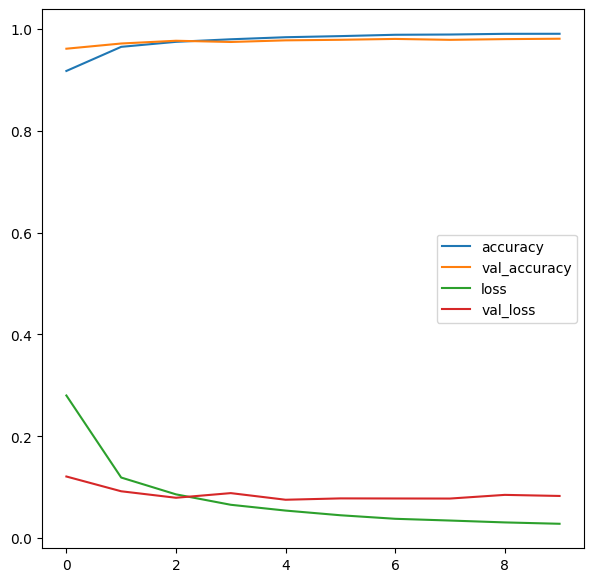

In [108]:
# Plot the accuracy and loss
plt.figure(figsize=(7,7))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [109]:
# Evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 857us/step - loss: 0.0830 - accuracy: 0.9804


[0.08302187919616699, 0.980400025844574]

In [110]:
# Predict the test dataset
y_pred = model.predict(X_test)

# Convert the predictions into a label
y_pred = np.argmax(y_pred, axis=1)

print("Classification Report: \n", classification_report(y_test, y_pred))

313/313 [==============================] - 0s 721us/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Axes: >

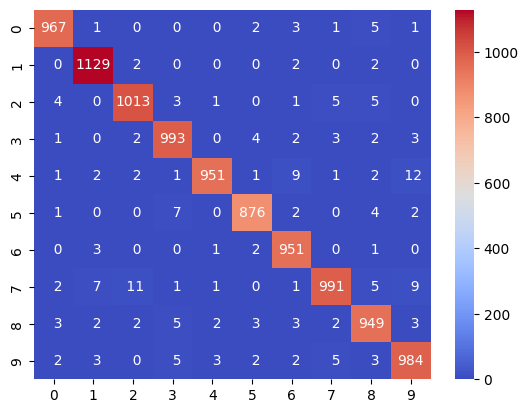

In [111]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="3.0f", cmap='coolwarm')

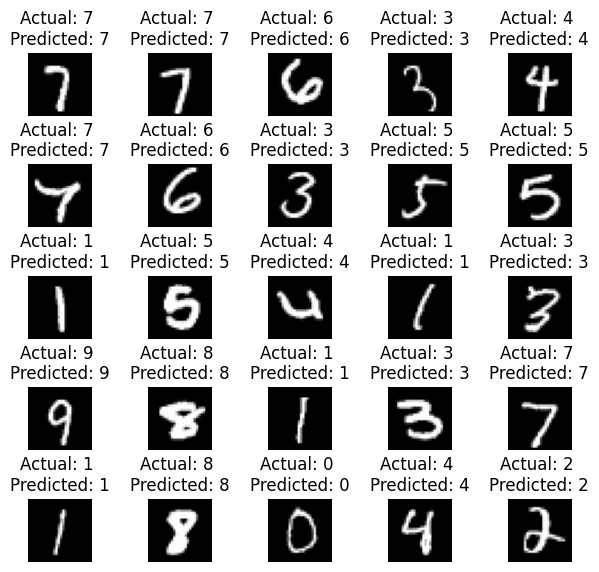

In [112]:
# Plot the neural network model
plt.figure(figsize=(7,7))
idx = 1

for i in np.random.randint(0, 1000, 25):
    # Reshape the 784 values into a 28x28 image
    img = X_test[i].reshape(28,28)
    plt.subplot(5, 5, idx)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(wspace=0.9)
    plt.title("Actual: {} \nPredicted: {}".format(y_test[i], y_pred[i]))
    plt.axis('off')
    idx += 1

plt.show()